In [2]:
# Dependencies
import pandas as pd
import nfl_data_py as nfl
import os
import urllib.request

# MPL Dependencies
from matplotlib import style
import matplotlib.pyplot as plt
import matplotlib.lines
from matplotlib.transforms import Bbox, TransformedBbox
from matplotlib.legend_handler import HandlerBase
from matplotlib.image import BboxImage

In [16]:
# Define the matchup parameters
year = 2005
week = '06'
away_team = 'JAX'
home_team = 'PIT'

In [4]:
# <!--------------PUT THIS IN A FUNCTION AND IMPORT, SOLVE "no logo_df found" error-------------!>

# Pull the team description
logos = nfl.import_team_desc()

# Keep only the necessary columns in the logos DataFrame
logos = logos[['team_abbr', 'team_logo_espn', 'team_color']]

# Initialize an empty list for the logo file paths
logo_paths = []

# Initialize an empty list for the team abbreviations
team_abbr = []

# Initialize an empty list for the team colors
team_color = []

# Create a folder for the image files if it doesn't exist
if not os.path.exists("logos"):
    os.makedirs("logos")

# Pull the team logos from the URL and save them in the logos folder, save the file paths to
for team in range(len(logos)):
    urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logos/{logos['team_abbr'][team]}.tif")
    logo_paths.append(f"logos/{logos['team_abbr'][team]}.tif")
    team_abbr.append(logos['team_abbr'][team])
    team_color.append(logos['team_color'][team])


# Create a dictionary to put logo_paths and team_abbr in
data = {'team_abbr': team_abbr, 'logo_path': logo_paths, 'team_color': team_color}

# Create a DataFrame from the dictionary
logo_df = pd.DataFrame(data)

In [17]:
# Load the NFL 2022 PBP data
pbp_df = nfl.import_pbp_data([year])

2005 done.
Downcasting floats.


In [18]:
pbp_df

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1.0,2005_01_ARI_NYG,2005091110,NYG,ARI,REG,1,None,None,None,...,0.0,0.0,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44.0,2005_01_ARI_NYG,2005091110,NYG,ARI,REG,1,ARI,away,NYG,...,0.0,0.0,0.181518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,66.0,2005_01_ARI_NYG,2005091110,NYG,ARI,REG,1,ARI,away,NYG,...,0.0,0.0,-0.507571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,85.0,2005_01_ARI_NYG,2005091110,NYG,ARI,REG,1,ARI,away,NYG,...,0.0,0.0,1.476770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,106.0,2005_01_ARI_NYG,2005091110,NYG,ARI,REG,1,ARI,away,NYG,...,0.0,0.0,-0.680936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47606,3859.0,2005_21_SEA_PIT,2006020500,PIT,SEA,POST,21,SEA,away,PIT,...,0.0,0.0,-0.253433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47607,3878.0,2005_21_SEA_PIT,2006020500,PIT,SEA,POST,21,SEA,away,PIT,...,0.0,0.0,0.135928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47608,3899.0,2005_21_SEA_PIT,2006020500,PIT,SEA,POST,21,SEA,away,PIT,...,0.0,0.0,-2.213517,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47609,3918.0,2005_21_SEA_PIT,2006020500,PIT,SEA,POST,21,PIT,home,SEA,...,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Filter down to a single game
pbp_df = pbp_df[pbp_df['game_id'] == f'{year}_{week}_{away_team}_{home_team}']

# Filter down to necessary columns
pbp_df = pbp_df[['posteam', 'game_seconds_remaining', 'away_wp', 'home_wp']]

# Rename posteam to team_abbr
pbp_df = pbp_df.rename(columns={'posteam':'team_abbr'})

In [20]:
# Join logo_df on pbp_df to get colors and logos
vis_df = pd.merge(pbp_df, logo_df)
vis_df

,team_abbr,game_seconds_remaining,away_wp,home_wp,logo_path,team_color
0,JAX,3600.0,0.535953,0.464047,logos/JAX.tif,#006778
1,JAX,3459.0,0.454899,0.545101,logos/JAX.tif,#006778
2,JAX,3400.0,0.436781,0.563219,logos/JAX.tif,#006778
3,JAX,3386.0,0.404932,0.595068,logos/JAX.tif,#006778
4,JAX,3382.0,0.381184,0.618816,logos/JAX.tif,#006778
...,...,...,...,...,...,...
173,PIT,891.0,0.121670,0.878330,logos/PIT.tif,#000000
174,PIT,844.0,0.168244,0.831756,logos/PIT.tif,#000000
175,PIT,817.0,0.171247,0.828753,logos/PIT.tif,#000000
176,PIT,699.0,0.431978,0.568022,logos/PIT.tif,#000000


In [12]:
# Define home and away color variables
away_color = vis_df[vis_df['team_abbr'] == away_team].iloc[0]['team_color']
home_color = vis_df[vis_df['team_abbr'] == home_team].iloc[0]['team_color']

# Define home and away logo paths
away_path = str(vis_df[vis_df['team_abbr'] == away_team].iloc[0]['logo_path'])
home_path = str(vis_df[vis_df['team_abbr'] == home_team].iloc[0]['logo_path'])

In [10]:
class HandlerLineImage(HandlerBase):

    def __init__(self, path, space=15, offset = 10 ):
        self.space=space
        self.offset=offset
        self.image_data = plt.imread(path)
        super(HandlerLineImage, self).__init__()

    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):

        l = matplotlib.lines.Line2D([xdescent+self.offset,xdescent+(width-self.space)/3.+self.offset],
                                    [ydescent+height/2., ydescent+height/2.])
        l.update_from(orig_handle)
        l.set_clip_on(False)
        l.set_transform(trans)

        bb = Bbox.from_bounds(xdescent +(width+self.space)/3.+self.offset,
                              ydescent,
                              height*self.image_data.shape[1]/self.image_data.shape[0],
                              height)

        tbb = TransformedBbox(bb, trans)
        image = BboxImage(tbb)
        image.set_data(self.image_data)

        self.update_prop(image, orig_handle, legend)
        return [l,image]

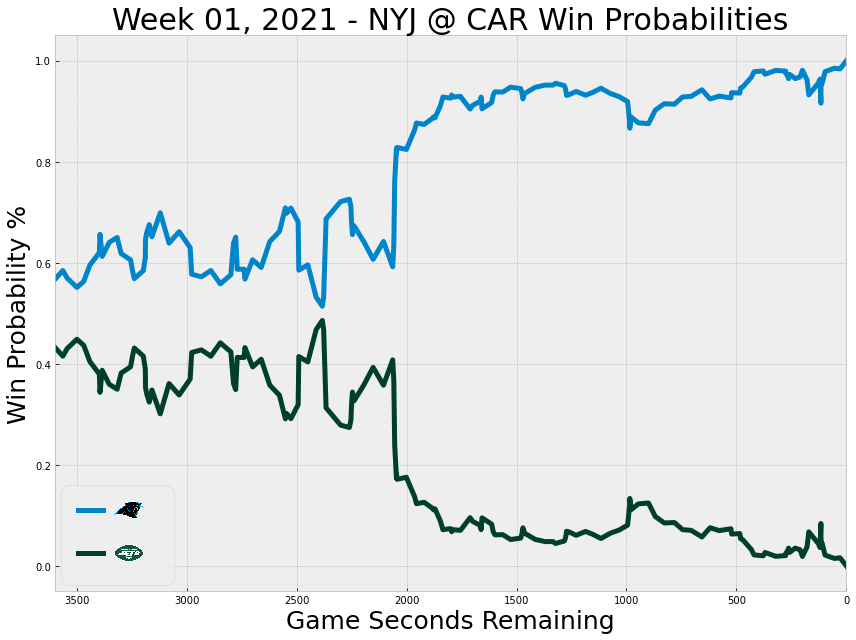

In [15]:
# Define plot size and autolayout
plt.rcParams["figure.figsize"] = [12, 9]
plt.rcParams["figure.autolayout"] = True

# Define the subplot
fig, ax = plt.subplots()

# Plot the data on the subplots
home_line, = ax.plot(
    pbp_df['game_seconds_remaining'],
    pbp_df['away_wp'],
    color=away_color,
    linewidth=5)


away_line, = ax.plot(
    pbp_df['game_seconds_remaining'],
    pbp_df['home_wp'],
    color=home_color,
    linewidth=5)

# Chart parameters
plt.title(f'Week {week}, {year} - {away_team} @ {home_team} Win Probabilities', fontdict={'fontsize':30});
plt.xlim((0,3600));
plt.xlabel("Game Seconds Remaining", {'fontsize':25});
plt.ylabel("Win Probability %", {'fontsize':25});

# Define the chart legend
plt.legend([away_line, home_line], ["", ""],
           handler_map= { home_line: HandlerLineImage(away_path), away_line: HandlerLineImage(home_path)},
           handlelength=2, labelspacing=0.0, fontsize=45, borderpad=0.15, loc=3,
           handletextpad=0.2, borderaxespad=0.15)

# Invert the x-axis so that it ends when there are 0 second remaining
ax.invert_xaxis()

# Style the chart
plt.style.use('default')